# k-Nearest-Neighbors

## Model Specification

In k-Nearest-Neighbor classifier, at each query or to-be-predicted point $x$, just find its $k$ nearest neighbors in the sample and cast a majority vote. Here distance is typically the Euclidean distance, weighted Euclidean distance or any distance function based on domain knowledge (especially when the attributes are heterogenous). For regression, the average is adopted. 

This is a very simple, model-free algorithm with some nice theoretical result: according to ESL, the famous result by Cover and Hart (1967) shows that asymptotically (i.e. when we have infinite amount of data and zero bias), the error rate of the 1-nearest-neighbor classifier, that pick the classification and the test point at random with the true class probability, is never more than twice the Bayes rate. But of course in practice the condition of this theorem will never be satisfied.

### Variants and Generalizations

**Invariant Metrics and Tangent Distance**

The motivation of invariant metrics comes from applying kNN to problems such as digit recognition. Presumably, we want a "3" to be close to a rotated "3". But the usual Euclidean distance between the pixel graphs of "3" and a rotated "3" can be large. One possible solution is to consider all transforms of the original graph and then compute distance between manifolds of the transforms, but that can be drastically different from the original graph, making, e.g. "6" to be close to "9". We thus needs a way to define distance for transforms, but only those local enough to the original graph. Comes in the **tangent distance**. The tangent can be computed by estimating the direction vector from small rotations of the image, or by more sophisticated spatial smoothing methods (did not go into detail here). See the graph below for more intuition.

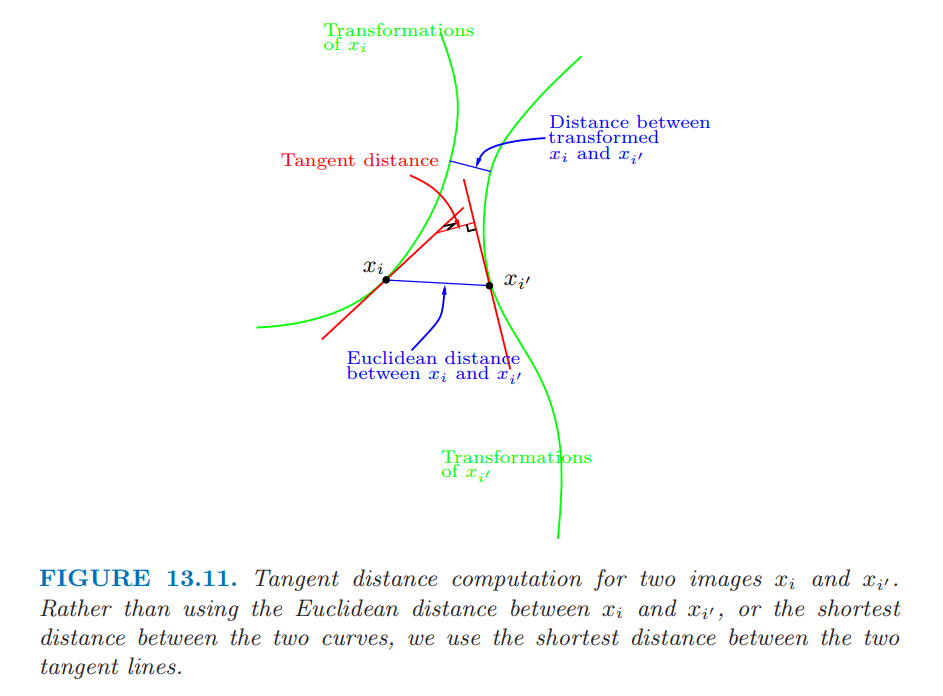

**Brute-force vs. Tree-based**

Fast computation of nearest neighbors is an active area of research in machine learning. The most naive neighbor search implementation involves the brute-force computation of distances between all pairs of points in the dataset: for $N$ samples in $p$ dimensions, this approach scales as $O[p N^2]$.

To address the computational inefficiencies of the brute-force approach, a variety of tree-based data structures have been invented. In general, these structures attempt to reduce the required number of distance calculations by efficiently encoding aggregate distance information for the sample. The basic idea is that if point $A$ is very distant from point $B$, and point $B$ is very close to point $C$, then we know that points $A$ and $C$ are very distant, without having to explicitly calculate their distance. In this way, the computational cost of a nearest neighbors search can be reduced to $O[D N \log(N)]$ or better. This is a significant improvement over brute-force for large N. In `sklearn` there are two such alternatives: `algorithm = 'kd_tree'` or `algorithm = 'ball_tree'`; see reference under Further reading.

**Adaptive Nearest Neighbors**

The traditional kNN sufferes in high dimension, in that the nearest $k$ neighbors can be very far away in high dimensions. One can mitigate this issue by expanding the neighborhood along the dimensions that does not have class switching by much. The intuition is better summarized in the following example.

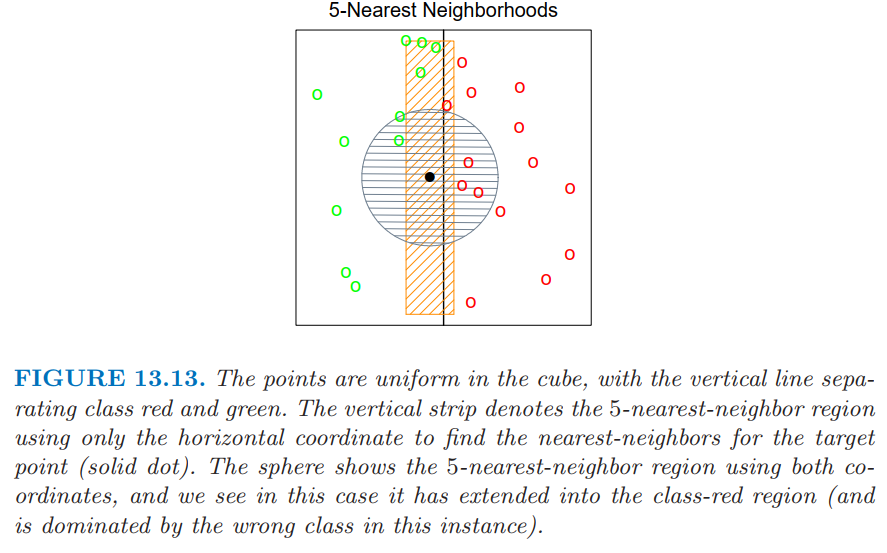

To achieve that automatically, the Discriminant Adaptive Nearest-Neighbor (DANN) metric generalize the distance measure at every query point $x_0$:

\begin{align}
D(x, x_0) = (x-x_0)^{\top}\Sigma(x-x_0),
\end{align}
where
\begin{align}
\Sigma &= W^{-1/2}[W^{-1/2}BW^{-1/2}+\epsilon I]W^{-1/2}\\
&= W^{-1/2}[B^{\ast}+\epsilon I]W^{-1/2}.
\end{align}
Here $W$ is the pooled within-class covariance matrix $\sum_{k=1}^K\pi_kW_k$ and $B$ is the between class covariance matrix $\sum_{k=1}^K\pi_k(\bar{x}_k-\bar{x})(\bar{x}_k-\bar{x})^{\top}$, with $W$ and $B$ computed using only the 50 nearest neighbored around $x_0$. With such defined metric $D$, the neighbor can indeed expand on directions that do not see much of a class change, thereby mitigating the effect of curse-of-dimensionality on nearest-neighbor.

## Theoretical Properties

### Advantages

- kNN is model free.

### Disadvantages

- kNN is memory intensive, since it has to store all the observations - there are ways to mitigate this; see the section below.
- kNN will suffer in high-dimensional problems, where the k-nearest points are not local any more. 
  - Most points in a high-dimensional hypercube are very close to the border.
  - High-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other.
  
  This is something that adaptive nearest neighbor seeks to mitigate.

### Relation to Other Models

- There is close relationship between nearest-neighbor and prototype methods: in 1-nearest-neighbor classfication, each training point is a prototype.

## Empirical Performance

### Advantages

- kNN is often successful where each class has many possible prototypes, and the decision boundary is very irregular.

### Disadvantages

## Implementation Details and Practical Tricks

**`KNeighborClassifier` in `sklearn`**

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, metric='minkowski')
neigh.fit(X, y) 
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))
[[ 0.66666667  0.33333333]]

**Selected Parameters**

- **`n_neighbors`**:

Number of neighbors to use by default for kneighbors queries.

- **`weights`**: 

Weight function used in prediction. Possible values:

    - `'uniform'` : uniform weights. All points in each neighborhood are weighted equally.
    - `'distance'` : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    - `[callable]` : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

- **`algorithm`**: 

Algorithm used to compute the nearest neighbors:

    - `'ball_tree'` will use `BallTree`
    - `'kd_tree'` will use `KDTree`
    - `'brute'` will use a brute-force search.
    - `'auto'` will attempt to decide the most appropriate algorithm based on the values passed to fit method.
Note: fitting on sparse input will override the setting of this parameter, using brute force.

- **`p`**:

Power parameter for the Minkowski metric. When `p = 1`, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for `p = 2`. For arbitrary p, minkowski_distance (l_p) is used.

- **`metric`**:

The distance metric to use for the tree. The default metric is minkowski, and with `p=2` is equivalent to the standard Euclidean metric. See the documentation of the `DistanceMetric` class for a list of available metrics.

**Selected Methods**

- **`kneighbors([X, n_neighbors, return_distance])`**:	Finds the K-neighbors of a point.

- **`kneighbors_graph([X, n_neighbors, mode])`**:	Computes the (weighted) graph of k-Neighbors for points in `X`

**`KNeighborsRegressor` in `sklearn`**

The interface is almost identical to that of `KNeighborsClassifier` above.

## Use Cases

## Results Interpretation, Metrics and Visualization

## References

- ESL Chapters 13.3-13.4
- [sklearn Document 1.6](http://scikit-learn.org/stable/modules/neighbors.html)

### Further Reading

- ['Multidimensional binary search trees used for associative searching'](https://dl.acm.org/citation.cfm?doid=361002.361007), Bentley, J.L., Communications of the ACM (1975)
- ['Five balltree construction algorithms'](http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.91.8209), Omohundro, S.M., International Computer Science Institute Technical Report (1989)

## Misc.